<a href="https://colab.research.google.com/github/jhyglory/Section1/blob/main/AI_01_%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%92%E1%85%A1%E1%84%8B%E1%85%A7%E1%86%BC_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()


Saving vgames2.csv to vgames2 (1).csv


In [ ]:
# 데이터 불러오기
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
#Unnamed 삭제
df2 = df.drop('Unnamed: 0', axis=1) 
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 결측치와 데이터 타입 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# 결측치 삭제
df3 = df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
# 년도 오름차순 정렬 
df3.sort_values('Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0,0,0.2,0
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0
14666,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0,0.01
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
8681,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.6,0,0.2
...,...,...,...,...,...,...,...,...,...
1786,The King of Fighters XIV,PS4,2016.0,Fighting,Deep Silver,0.04,0.01,0.03,0.01
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0


In [ ]:
# 년도 정상화, 실수 -> 정수로 바꾸기
change = {0:2000, 1:2001, 2:2002, 3:2003, 4:2004, 5:2005, 6:2006, 7:2007, 8:2008, 
          9:2009,  10:2010, 11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 
          86:1986, 94:1994, 95:1995, 96:1996, 97:1997, 98:1998}

df4 = df3.replace({'Year' : change})
df4['Year'] = pd.to_datetime(df4.Year, format='%Y').dt.year
df4['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [ ]:
# 매출액에 있는 M,K 없애기, 문자열-> 실수로 바꾸기
df4['NA_Sales'] = df4['NA_Sales'].str.replace('M','')
df4['EU_Sales'] = df4['EU_Sales'].str.replace('M','')
df4['JP_Sales'] = df4['JP_Sales'].str.replace('M','')
df4['Other_Sales'] = df4['Other_Sales'].str.replace('M','')
df4['NA_Sales'] = df4['NA_Sales'].apply(lambda x: float(x[:-1])*0.001 if x.endswith('K') else float(x))
df4['EU_Sales'] = df4['EU_Sales'].apply(lambda x: float(x[:-1])*0.001 if x.endswith('K') else float(x))
df4['JP_Sales'] = df4['JP_Sales'].apply(lambda x: float(x[:-1])*0.001 if x.endswith('K') else float(x))
df4['Other_Sales'] = df4['Other_Sales'].apply(lambda x: float(x[:-1])*0.001 if x.endswith('K') else float(x))
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
#전세계 매출액 column 만들기
df4['Global_Sales'] = df4.apply(lambda x: x.NA_Sales + x.EU_Sales + x.JP_Sales + x.Other_Sales, axis = 'columns')
df4.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25




---
# 1. 지역에 따라서 선호하는 게임 장르가 다를까 ?
   






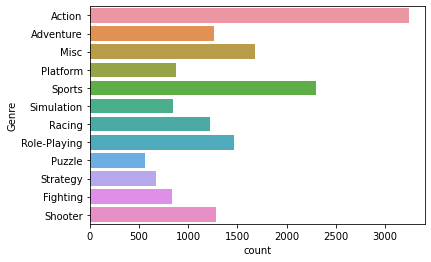

In [ ]:
# 장르별 게임의 개수
sns.countplot(y='Genre', data=df4)
plt.style.use('classic')

*    장르별로 게임의 개수가 다르기 때문에 총 매출액이 아닌 평균을 구해야 한다고 판단하였다.
*   특정 장르에서 특정 게임만 매출액이 월등히 높아 그 장르의 총 매출액이 높은 경우 그 장르 자체를 선호한다고 보기에는 무리가 있다. ( 매출액이 높은 게임이 단순히 장르를 선호해서가 아니라 게임의 스토리나 그래픽, 비싼가격 등 추가요인으로 인해 매출액이 높아질 수 있다. )
* -> 궁극적인 목표인 "다음 분기에 어떤 게임을 설계해야 할까?" 라는 질문에 총 매출액이 높은 장르의 게임보다는 평균 매출액이 높은 장르로 게임을 설계하는 것이 실패할 확률이 적다.

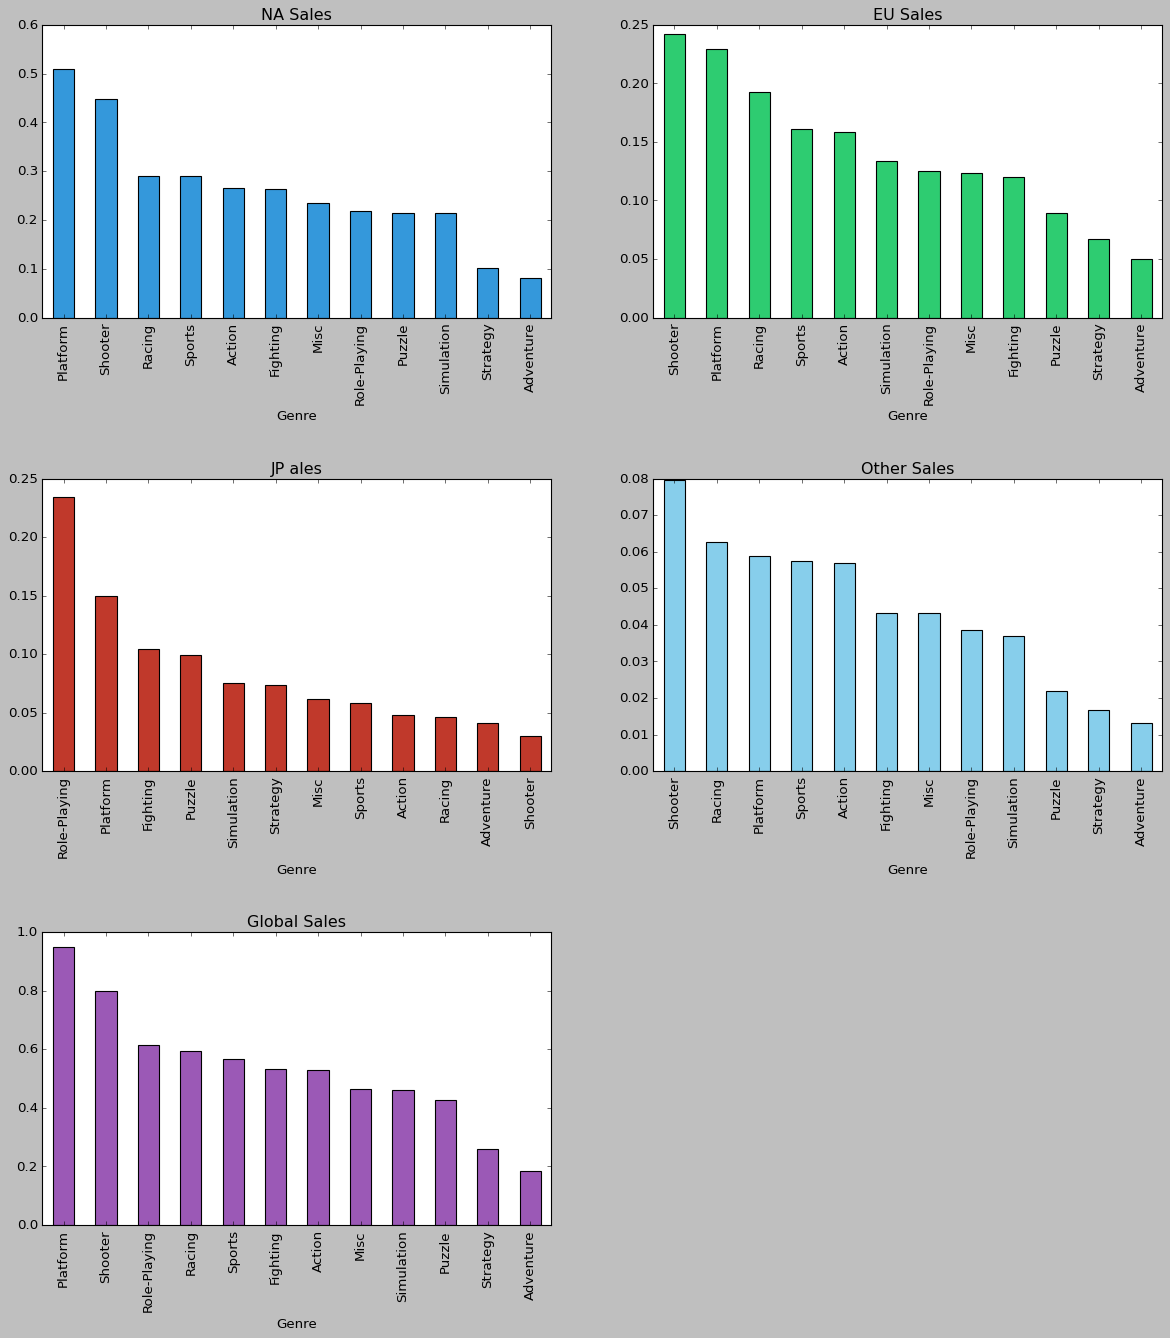

In [ ]:
# 북미 장르별 매출액 평균
gb_NA_Sales = df4.groupby('Genre')['NA_Sales'].mean()
NA_bar = gb_NA_Sales.sort_values(ascending=False)
plt.figure(figsize=(20,25))
plt.style.use('classic')
plt.subplot(321)
NA_bar.plot(kind='bar', color = '#3498db',edgecolor='k', title='NA Sales')
plt.subplots_adjust(left=0.2, bottom=0.3, right=0.9, top=0.9, wspace=0.2, hspace=0.55)

# 유럽 장르별 매출액 평균
gb_EU_Sales = df4.groupby('Genre')['EU_Sales'].mean()
EU_bar = gb_EU_Sales.sort_values(ascending=False)
plt.subplot(322)
EU_bar.plot(kind='bar', color = '#2ecc71', edgecolor='k', title='EU Sales')

# 일본 장르별 매출액 평균
gb_JP_Sales = df4.groupby('Genre')['JP_Sales'].mean()
JP_bar = gb_JP_Sales.sort_values(ascending=False)
plt.subplot(323)
JP_bar.plot(kind='bar', color = '#c0392b', edgecolor='k', title='JP ales')

# 기타지역 장르별 매출액 평균
gb_OtherSales = df4.groupby('Genre')['Other_Sales'].mean()
Other_bar = gb_OtherSales.sort_values(ascending=False)
plt.subplot(324)
Other_bar.plot(kind='bar', color = 'skyblue', edgecolor='k', title='Other Sales')

# 전 세계 장르별 매출액 평균
gb_GlobalSales = df4.groupby('Genre')['Global_Sales'].mean()
Global_bar = gb_GlobalSales.sort_values(ascending=False)
plt.subplot(325)
Global_bar.plot(kind='bar', color = '#9b59b6', edgecolor='k', title='Global Sales')




*   북미의 매출액 평균은 Platform -> Shooter -> Racing 순으로 높다.
*   유럽의 매출액 평균은 Shooter -> Platform -> Racing 순으로 높다.
*   일본의 매출액 평균은 Role-playing -> Platform -> Fighting 순으로 높다.
*   기타지역의 매출액 평균은 Shooter -> Racing -> Platform 순으로 높다.
*   전 세계 매출액 평균은 Platform -> Shooter -> Role-playing 순으로 높다.









---



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


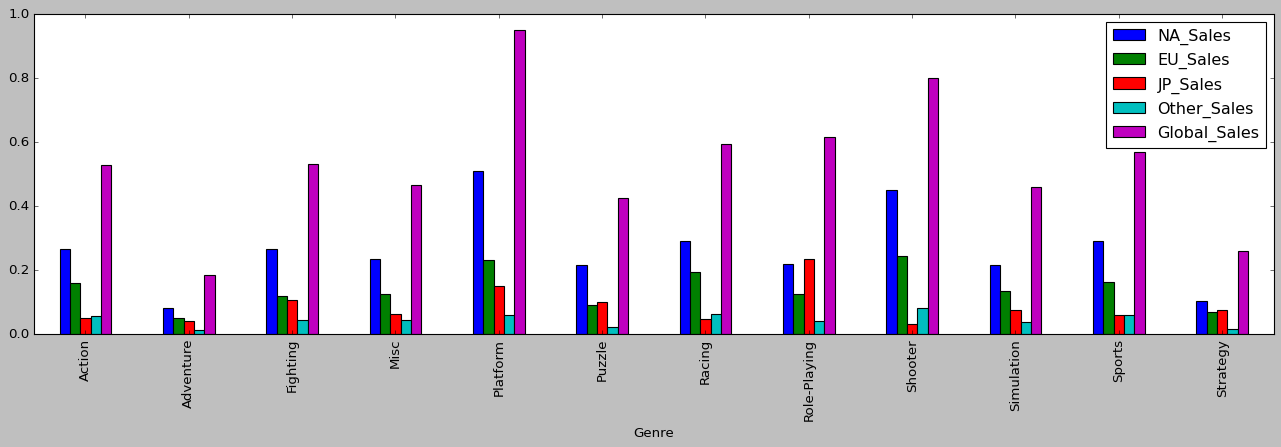

In [ ]:
# 모든 지역과 모든 장르의 매출액 평균 비교
Sales = df4.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()
plt.style.use('classic')
Sales.plot(kind='bar',figsize = (20,5), edgecolor = 'k')

# 2.연도별 게임의 트렌드가 있을까?


*   트렌드를 알아보기 위해선 연도별로 플랫폼과 장르의 총 매출액을 시각화하였다.



Text(0, 0.5, 'Global_Sales')

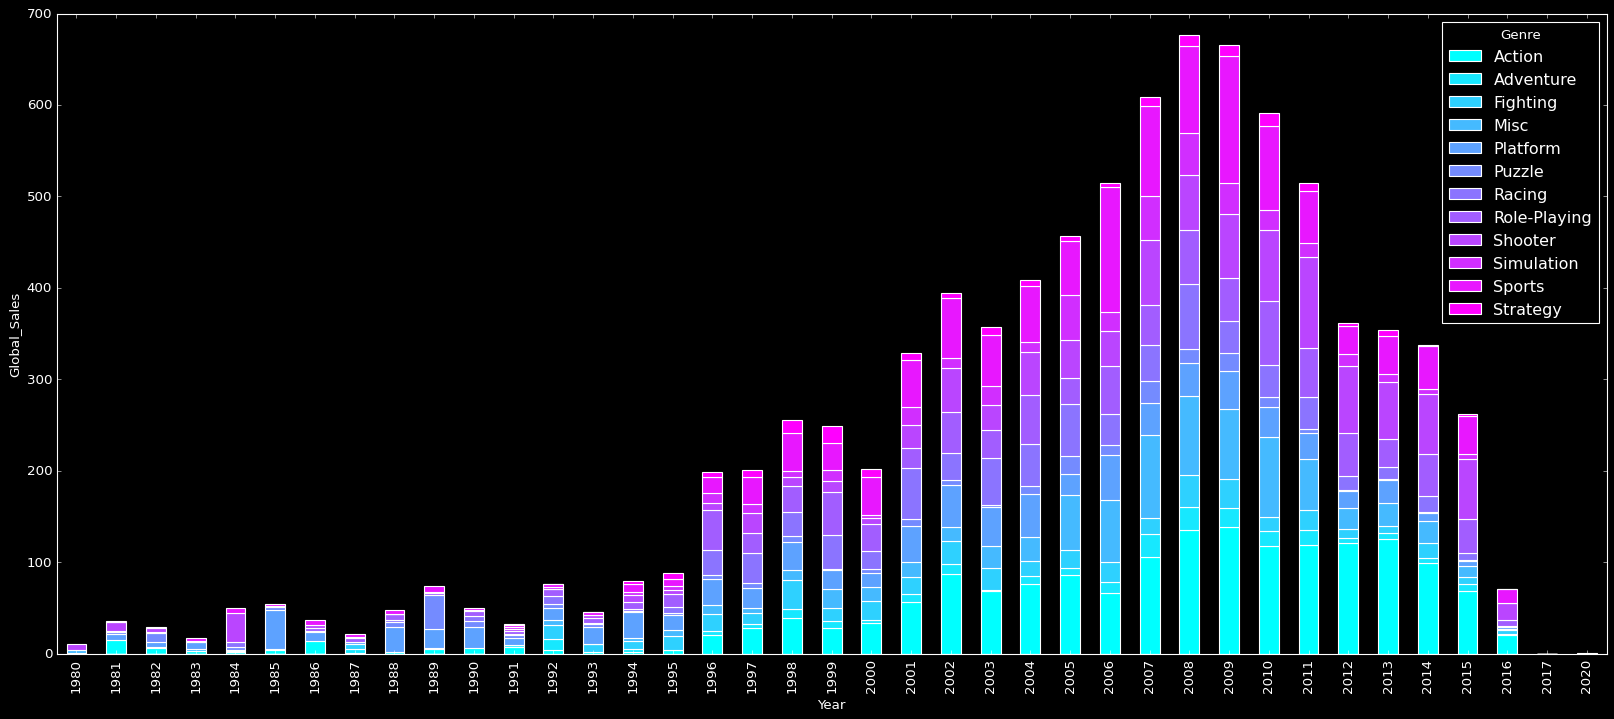

In [ ]:
#전 세계 년도별 장르별 총 매출액 
yearly_Genre = df4.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack(level=1)
plt.style.use('dark_background')
yearly_Genre.plot(kind='bar', stacked=True, colormap= 'cool', grid=False, figsize=(25,10))
plt.ylabel('Global_Sales')

Text(0.5, 1.0, '7 Years, Average')

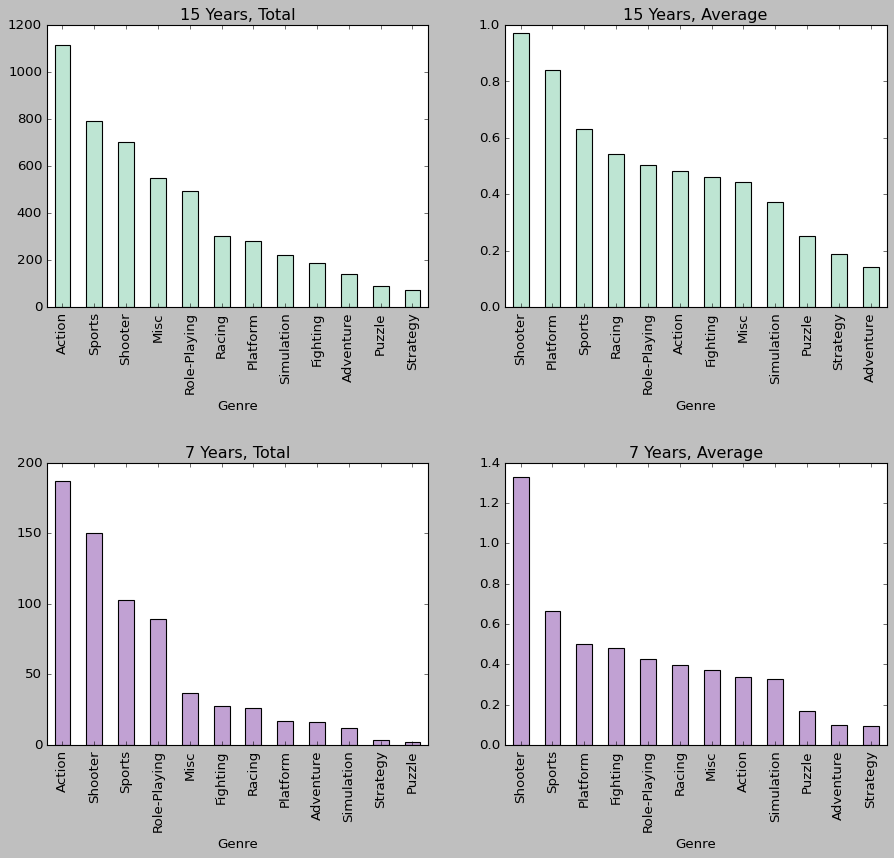

In [ ]:
#장르 최근 15년 총 매출액
Gr10total = df4[df4['Year'] >= 2006].groupby('Genre')['Global_Sales'].sum()
Gr10total_bar = Gr10total.sort_values(ascending=False)
plt.figure(figsize=(15,15))
plt.style.use('classic')
plt.subplot(221)
Gr10total_bar.plot(kind='bar', color = '#bee5d3', edgecolor='k')
plt.title('15 Years, Total')
plt.subplots_adjust(left=0.2, bottom=0.3, right=0.9, top=0.9, wspace=0.2, hspace=0.55)

#장르 최근 15년 평균 매출액
Gr10ar = df4[df4['Year'] >= 2006].groupby('Genre')['Global_Sales'].mean()
Gr10ar_bar = Gr10ar.sort_values(ascending=False)
plt.subplot(222)
Gr10ar_bar.plot(kind='bar', color = '#bee5d3', edgecolor='k')
plt.title('15 Years, Average')

#장르 최근 7년 총 매출액
Gr5total= df4[df4['Year'] >= 2014].groupby('Genre')['Global_Sales'].sum()
Gr5total_bar = Gr5total.sort_values(ascending=False)
plt.subplot(223)
Gr5total_bar.plot(kind='bar', color = '#c1a1d3', edgecolor='k')
plt.title('7 Years, Total')

#장르 최근 7년 평균 매출액
Gr5ar = df4[df4['Year'] >= 2014].groupby('Genre')['Global_Sales'].mean()
Gr5ar_bar = Gr5ar.sort_values(ascending=False)
plt.subplot(224)
Gr5ar_bar.plot(kind='bar', color = '#c1a1d3', edgecolor='k')
plt.title('7 Years, Average')


Text(0, 0.5, 'Global_Sales')

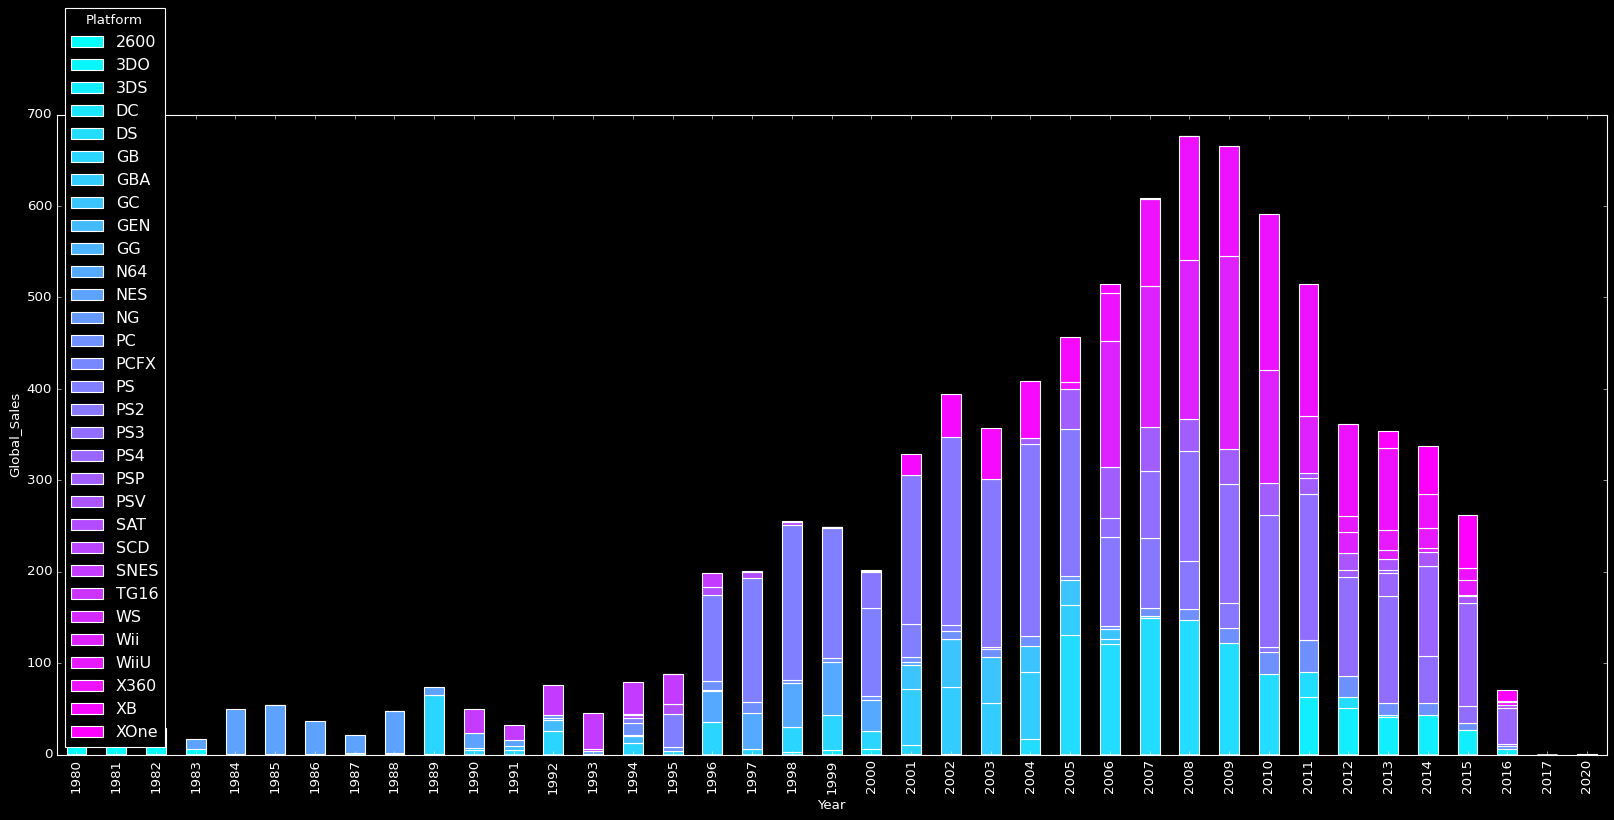

In [ ]:
# 전 세계 년도별 플랫폼 총 매출액
yearly_Plf = df4.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack(level=1)
plt.style.use('dark_background')
yearly_Plf.plot(kind='bar',stacked=True, colormap= 'cool', grid=False,  figsize=(25,10))
plt.ylabel('Global_Sales')

Text(0.5, 1.0, '7 Years, Average')

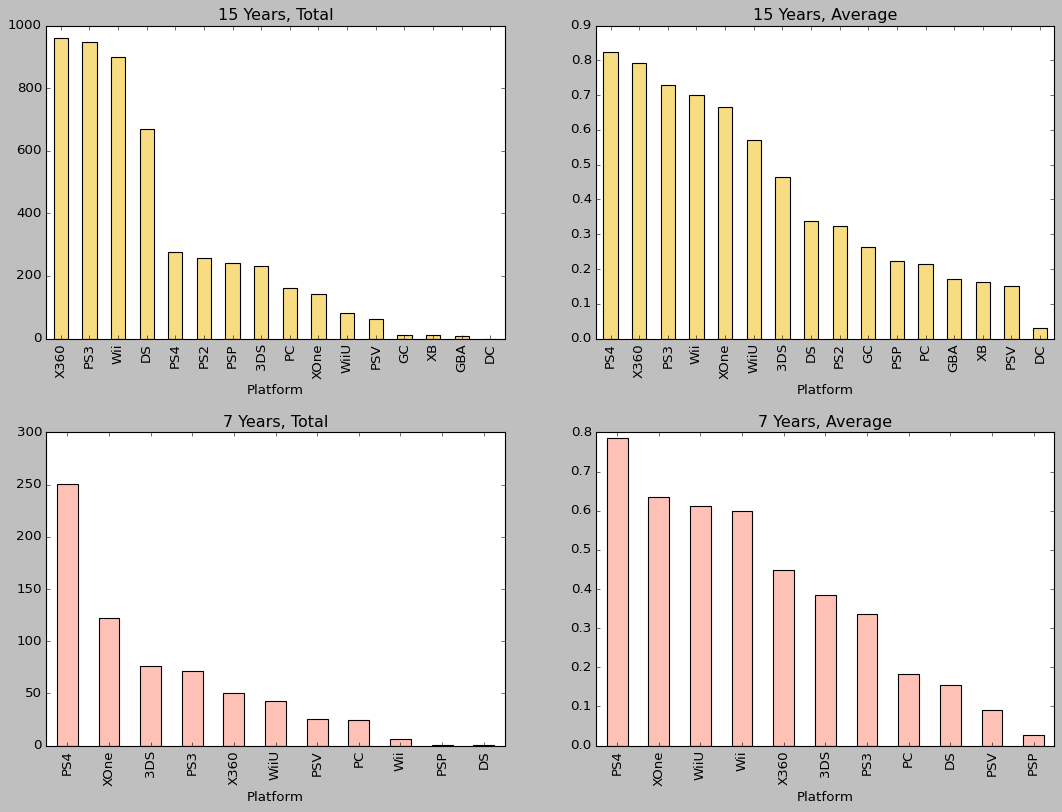

In [ ]:

#플랫폼 최근 15년 총 매출액
plf10tt = df4[df4['Year'] >= 2006].groupby('Platform')['Global_Sales'].sum()
plf10tt_bar = plf10tt.sort_values(ascending=False)
plt.figure(figsize=(18,15))
plt.style.use('classic')
plt.subplot(221)
plf10tt_bar.plot(kind='bar', color = '#f8dc81', edgecolor='k')
plt.subplots_adjust(left=0.2, bottom=0.3, right=0.9, top=0.9, wspace=0.2, hspace=0.3)
plt.title('15 Years, Total')


#최근 15년 평균 매출액
plf10ar = df4[df4['Year'] >= 2006].groupby('Platform')['Global_Sales'].mean()
plf10ar_bar = plf10ar.sort_values(ascending=False)
plt.subplot(222)
plf10ar_bar.plot(kind='bar', color = '#f8dc81', edgecolor='k')
plt.title('15 Years, Average')

#최근 7년 총 매출액
plf5tt = df4[df4['Year'] >= 2014].groupby('Platform')['Global_Sales'].sum()
plf5tt_bar = plf5tt.sort_values(ascending=False)
plt.subplot(223)
plf5tt_bar.plot(kind='bar', color = '#ffc1b6', edgecolor='k')
plt.title('7 Years, Total')

#최근 7년 평균 매출액
plf5ar = df4[df4['Year'] >= 2014].groupby('Platform')['Global_Sales'].mean()
plf5ar_bar = plf5ar.sort_values(ascending=False)
plt.subplot(224)
plf5ar_bar.plot(kind='bar', color = '#ffc1b6', edgecolor='k')
plt.title('7 Years, Average')




---



# 3. 매출이 높은 게임에 대한 분석 및 시각화 프로세스  



In [ ]:
#2014 이후로 전 세계 매출이 높은 게임
df4[df4['Year'] >= 2014].sort_values('Global_Sales', ascending=False).reset_index(drop=True).head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
3,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61
6,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
7,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.29
8,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
9,Mario Kart 8,WiiU,2014,Racing,Nintendo,3.13,2.07,1.27,0.49,6.96


In [ ]:
#2014 이후로 북미 매출이 높은 게임
df4[df4['Year'] >= 2014].sort_values('NA_Sales',ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
1,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.29
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
3,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
4,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
5,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,3.21,1.53,0.01,0.38,5.13
6,Mario Kart 8,WiiU,2014,Racing,Nintendo,3.13,2.07,1.27,0.49,6.96
7,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
8,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61
9,Call of Duty: Advanced Warfare,X360,2014,Shooter,Activision,2.75,1.18,0.00,0.37,4.30


In [ ]:
#2014 이후로 유럽 매출이 높은 게임
df4[df4['Year'] >= 2014].sort_values('EU_Sales',ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
1,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
2,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3,FIFA 15,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.60
4,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
6,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61
7,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
8,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
9,FIFA 15,PS3,2014,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82


In [ ]:
#2014 이후로 일본 매출이 높은 게임
df4[df4['Year'] >= 2014].sort_values('JP_Sales',ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,0.03,0.00,3.18,0.00,3.21
1,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
2,Monster Hunter X,3DS,2015,Action,Capcom,0.25,0.19,2.78,0.04,3.26
3,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,Level 5,0.00,0.00,2.68,0.00,2.68
4,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,Nintendo,0.67,0.49,2.62,0.11,3.89
5,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
6,Yokai Watch Busters,3DS,2015,Action,Level 5,0.00,0.00,2.28,0.00,2.28
7,Splatoon,WiiU,2015,Shooter,Nintendo,1.55,1.15,1.44,0.43,4.57
8,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,Nintendo,0.47,1.00,1.39,0.12,2.98
9,Yokai Watch 3,3DS,2016,Action,Level 5,0.00,0.00,1.27,0.00,1.27


In [ ]:
#2014 이후로 기타지역 매출이 높은 게임
df4[df4['Year'] >= 2014].sort_values('Other_Sales',ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
2,FIFA 15,PS4,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.60
3,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61
4,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
5,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
6,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
7,FIFA 15,PS3,2014,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
8,Destiny,PS4,2014,Shooter,Activision,2.49,2.05,0.16,0.96,5.66
9,Minecraft,PS3,2014,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42




---




전 세계 매출액과 어느 지역이 가장 상관관계가 깊은지 피어슨 상관계수를 알아보았다.

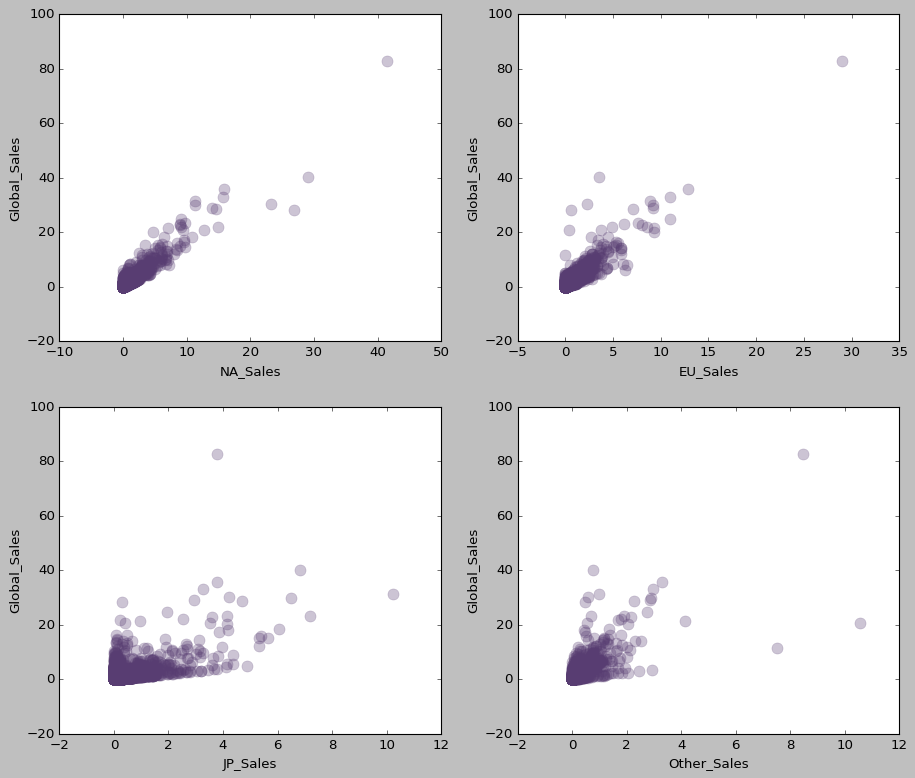

In [55]:
plt.style.use('classic')
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.regplot(
    x = df4['NA_Sales'], y = df4['Global_Sales'], marker='o', fit_reg = False, 
    scatter_kws={'color':'#583d72','alpha':0.3, 's':100},
    line_kws={'color':'r', 'alpha':0.7, 'lw':3}          
              )
plt.subplots_adjust(left=0.2, bottom=0.3, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

plt.subplot(222)
sns.regplot(
    x = df4['EU_Sales'], y = df4['Global_Sales'], marker='o', fit_reg = False, 
    scatter_kws={'color':'#583d72','alpha':0.3, 's':100},
    line_kws={'color':'r', 'alpha':0.7, 'lw':3}           
         )

plt.subplot(223)
sns.regplot(
    x = df4['JP_Sales'], y = df4['Global_Sales'], marker='o', fit_reg = False, 
    scatter_kws={'color':'#583d72','alpha':0.3, 's':100},
    line_kws={'color':'r', 'alpha':0.7, 'lw':3}     
          )

plt.subplot(224)
plt.style.use('classic')
sns.regplot(
    x = df4['Other_Sales'], y = df4['Global_Sales'], marker='o', fit_reg = False, 
    scatter_kws={'color':'#583d72','alpha':0.3, 's':100},
    line_kws={'color':'r', 'alpha':0.7, 'lw':3}           )

# **결론**
1. 전 세계적으로 최근 7년 평균 매출액이 높았던 플레이스테이션 플랫폼을 통해 슈팅게임과 스포츠 게임을 만든다.
2. 일본 시장을 겨냥해 닌텐도의 플랫폼을 통해 롤플레잉 게임을 만든다.